### Linear Regression :  
### It is an supervised machine learning algorithm for regression 
### that provides a linear relationship between an independent and dependent variable to predict the outcome of future events.

### Equation Of Straight Line :
### Y = M x + C
### Where 
### M is slope or Co-efficient
### C is Intercept or constant

### Cost Functions : 
#### 1) MSE
#### 2) MAE

### Performance Metrics :
#### 1) R square
#### 2) Adjusted R square

## Linear Regression implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("../M9_Inputs/boston_house_prices.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.rename(columns={"MEDV":"Price"},inplace=True)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

## Linear Regression


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [6]:
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769913


#### Cross val score will internally apply the alogorithms
#### neg_mean_squared_error (Negative MSE) is smilar to mean_squared_error

## Ridge Regression (L2 Regularization)
### 1) penalizes high-value coefficients by introducing a penalty term in the MSE loss function
### 2) he penalty term is squared value of coefficients rather than the absolute value of coefficients
### 3) we can use ridge for prevent overfitting model and does not enact feature selection

### 1) How do i select the alpha value (penality value) ? 
#### By using the GridSearchCV method
### 2) What is GridSearchCV ?
#### by playing with all alpha value and giving the best score
### 3) verbose = Messages (like log while training the model)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

#1e-15 = 10 to power of - 15
#Alpha value start with very small number(1e-15)
#whenever the lower scoring parameter and best will choose

ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [8]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540354


#### In Linear regression we have -37.13180746769913 and In ridge we have -29.905701947540354

## Lasso Regression (L1 Regularization)
### penalizes high-value coefficients by introducing a penalty term in the SSE loss function
### This penalty term is the absolute value of coefficients
### it enact for the feature selection

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.887e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: O

{'alpha': 1}
-35.531580220694856


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [12]:
pd.DataFrame(prediction_ridge)

,0
0,23.966759
1,24.989960
2,27.591589
3,14.260594
4,19.638429
...,...
147,28.012536
148,13.750550
149,7.934103
150,29.329458


In [13]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
4      36.2
428    11.0
385     7.2
308    22.8
5      28.7
Name: Price, Length: 152, dtype: float64

#### Verfiying model : (prediction  vs y_test)

/tmp/ipykernel_47017/2904685435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

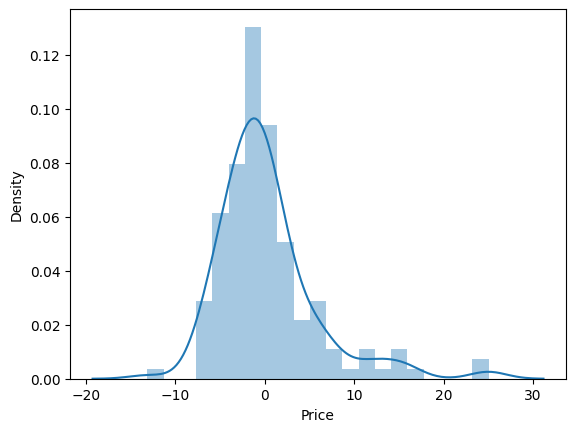

In [14]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

/tmp/ipykernel_47017/3356612006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='Price', ylabel='Density'>

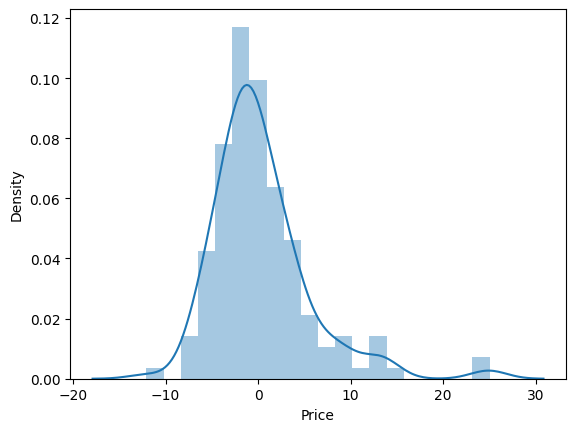

In [15]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test,prediction_lasso)

0.6287082026755156

In [18]:
r2_score(y_test,prediction_ridge)

0.663520224592447